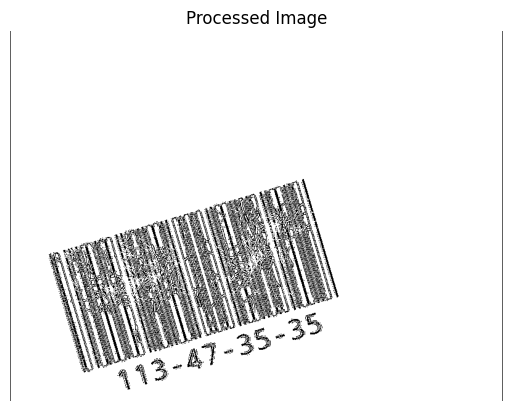

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image with a corrected file path
img = cv2.imread("E://Study//Senior 1//Fall 24//Computer Vision//Project//barcode_vision//Test Case Images//11 - bayza 5ales di bsara7a.jpg", cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if img is None:
    print("Error: Image not found!")
else:
    # Step 1: Apply FFT
    img_float = np.float32(img)
    f = np.fft.fft2(img_float)
    fshift = np.fft.fftshift(f)  # Shift zero frequency components to the center

    # Step 2: Create a mask to filter out the sine wave (specific frequency components)
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2

    # Example: A simple mask to remove a specific frequency range (you can fine-tune this)
    mask = np.ones((rows, cols), np.uint8)
    mask[crow-30:crow+30, ccol-30:ccol+30] = 0  # Modify this to match your sine wave frequency

    # Step 3: Apply the mask to filter out the sine wave components
    fshift = fshift * mask

    # Step 4: Perform Inverse FFT to get the image back
    f_ishift = np.fft.ifftshift(fshift)  # Reverse the shift
    img_back = np.fft.ifft2(f_ishift)  # Inverse FFT
    img_back = np.abs(img_back)  # Take the absolute value (since the result may have small imaginary parts)

    # Step 5: Normalize the result to the correct range
    img_back = np.uint8(np.clip(img_back, 0, 255))
    # Invert the image colors
    img_back = cv2.bitwise_not(img_back)

    # Increase sharpness using a sharpening filter
    sharpening_filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    img_back = cv2.filter2D(img_back, -1, sharpening_filter)

    # Step 6: Apply Otsu's thresholding
    _, processed_image = cv2.threshold(img_back, 0, 255, cv2.THRESH_OTSU)

    # Apply edge detection using Canny
    edges = cv2.Canny(processed_image, 100, 200)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a mask for filling contours
    mask = np.zeros_like(processed_image)

    # Fill contours
    for contour in contours:
        cv2.drawContours(mask, [contour], -1, (255), -1)
        cv2.fillPoly(mask, pts=[contour], color=(255))
    # Apply mask to the original image
    result = cv2.bitwise_and(processed_image, mask)

    # Increase sharpness again
    processed_image = cv2.filter2D(processed_image, -1, sharpening_filter)

    # Save the image
    cv2.imwrite("processed_image.jpg", processed_image)

    # Step 7: Display the result
    plt.imshow(processed_image, cmap='gray')
    plt.title("Processed Image")
    plt.axis('off')
    plt.show()
